# Libraries

In [2]:
from scipy.integrate import odeint
import numpy as np

from util_figures import time_series_figure
from main import Model

# Global variables

In [3]:
# Initialization parameters
initial_velocity = 0
atmospheric_pressure = 1e5

adiabatic_index = 1.33
vapor_pressure = 3.2718e3

temperature = 20

# Generation of temperature dependent parameters 

In [4]:
sound_velocity = Model.sound_velocity_generator_temperature(temperature)
surface_tension = Model.surface_tension_generator_temperature(temperature)
density = Model.density_generator_temperature(temperature)
viscosity = Model.viscosity_generator_temperature(temperature)

# Stable cavitation 

In [5]:
acoustic_pressure = 0.3e6
frequency = 1.2e6
initial_radius = 10e-6

periods = 25
times = np.arange(0, periods / frequency, 0.00001 / frequency)

general_model = Model(acoustic_pressure, frequency, initial_radius, initial_velocity, atmospheric_pressure,
                      surface_tension, density, viscosity, sound_velocity, vapor_pressure, adiabatic_index)

result_rayleigh_plesset = odeint(general_model.rayleigh_plesset_equation, [1, 0], times * frequency, tfirst=True)
result_keller_miksis = odeint(general_model.keller_miksis_equation, [1, 0], times * frequency, tfirst=True)
result_gilmore = odeint(general_model.gilmore_equation, [1, 0], times * 2 * np.pi * frequency, tfirst=True)

In [6]:
data = dict()
data['x_axis_data'] = [times * frequency, times * frequency, times * frequency]
data['y_axis_data'] = [result_rayleigh_plesset[:, 0], result_keller_miksis[:, 0], result_gilmore[:, 0]]
data['labels'] = ['Rayleigh-Plesset', 'Keller-Miksis', 'Gilmore']
data['x_lim'] = [0, 10]
data['y_lim'] = [0, 1.5]
data['savefig'] = True
data['name_fig'] = 'stable_cavitation.pdf'
data['legend_title'] = 'Differential equation'
data['x_label'] = "Time (periods)"
data['y_label'] = "Radius (non dimensional)"

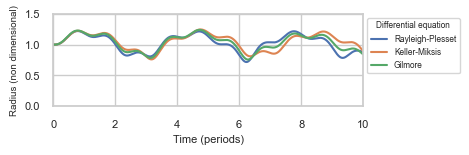

In [7]:
time_series_figure(data=data)

# Transient cavitation 

In [8]:
acoustic_pressure = 2000000
frequency = 1.2e6
initial_radius = 0.000004

periods = 10
times = np.arange(0, periods / frequency, 0.00001 / frequency)

general_model = Model(acoustic_pressure, frequency, initial_radius, initial_velocity, atmospheric_pressure,
                      surface_tension, density, viscosity, sound_velocity, vapor_pressure, adiabatic_index)

result_rayleigh_plesset = odeint(general_model.rayleigh_plesset_equation, [1, 0], times * frequency, tfirst=True)
result_keller_miksis = odeint(general_model.keller_miksis_equation, [1, 0], times * frequency, tfirst=True)
result_gilmore = odeint(general_model.gilmore_equation, [1, 0], times * 2 * np.pi * frequency, tfirst=True)

In [9]:
data = dict()
data['x_axis_data'] = [times * frequency, times * frequency, times * frequency]
data['y_axis_data'] = [result_rayleigh_plesset[:, 0], result_keller_miksis[:, 0], result_gilmore[:, 0]]
data['labels'] = ['Rayleigh-Plesset', 'Keller-Miksis', 'Gilmore']
data['x_lim'] = []
data['y_lim'] = []
data['savefig'] = True
data['name_fig'] = 'transient_cavitation.pdf'
data['legend_title'] = 'Differential equation'
data['x_label'] = "Time (periods)"
data['y_label'] = "Radius (non dimensional)"

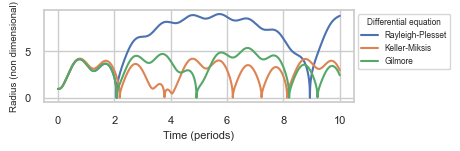

In [10]:
time_series_figure(data=data)